:## TP sur la regression lineaire

Hi there!,

In this tutorial, we will look at how to find parameters of a simple linear regression problem using;

* batch gradient descent

In [ ]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(10)

In [ ]:
def plot(X, y, theta, epoch, plot_every=1):
  """Plotting function for features and targets"""
  if plot_every is not None and epoch % plot_every == 0:
    xtest = np.linspace(0, 1, 10).reshape(-1,1)
    ypred = linear_function(xtest, theta).reshape(-1,1)
    plt.scatter(X, y, marker="+")
    plt.xlabel("feature")
    plt.ylabel("target")
    plt.plot(xtest, ypred, color="orange")
    plt.show()


In [ ]:
# from time import sleep
def plot_loss(losses):
  """Plotting function for losses"""
  plt.plot(losses)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("training curve")

Lets begin with some randomly generated data. Plots will allow us visualise the data and functions we approximate along the way

In [ ]:
X = np.linspace(0,1, 50)
Y = X + np.random.normal(0, 0.1, (50,))
#50 valeurs moyenne 0 et ecart type 0.1

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [ ]:
Y.shape

(50, 1)

In [ ]:
X.shape

(50, 1)

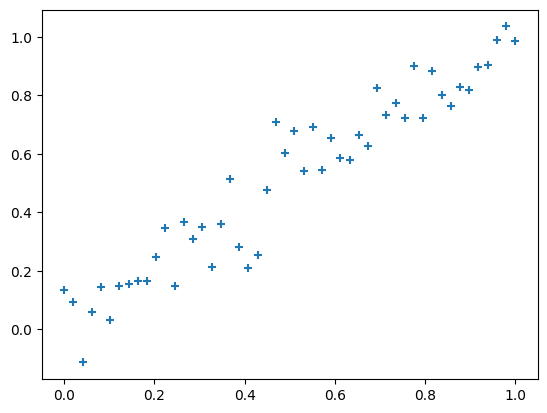

In [ ]:
plt.scatter(X, Y, marker="+")

# Split les donnees en train et test

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.7)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((35, 1), (15, 1), (35, 1), (15, 1))

# Utilisez SKLEARN POUR LA REGRESSION LINEAIRE

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
model = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# Make predictions using the testing set
ypred = model.predict(xtest)

In [ ]:
MSE = mean_squared_error(ytest, ypred)
print("MSE:", MSE)

MSE: 0.006542836310179728


# Impementation from scratch

In class, we learnt that, when developing a machine learning solution to a problem,  we need a few things;
  - Data {features, targets}
  - Hypothesis (based of the relationship we observe between features and targets)
  - A criterion (A function evaluates our hypothesis)
  - A learning algorithm (An algorithm to find the best parameters for our hypothesis)

# Hypothesis
Lets begin with the hypothesis

Here, in our one dimensional data, its easy to observe and linear relationship between our features and targets. So we may settle on the linear function below

$$y = X\theta$$

where, $X \in \mathbb{R}^{N x D}, \theta \in \mathbb{R}^{D}, y \in \mathbb{R}^N$

In [ ]:
def linear_function(X, theta):
  """
  Compute the dot product of X$\theta$
  Args:
    X: feature matrix (size - N x D)
    theta: parameters (size - D x 1)

  Returns:
    output y, size N x 1
  """

  return np.dot(X, theta)


## Criterion/ Loss function
Since we have a continuous label, this problem is essentially a regression one and we can use a mean squared error loss.

This is given as $$L(\theta) = \frac{1}{N}∑(y - {\bar y})^2$$
where $y$ is the targets and $\bar y$ is the output of our hypothesis

In [ ]:
def mean_squared_error(ytrue, ypred):
  """
  Computes the mean squared error
  Args:
    ytrue: vector of true labels
    ypred: vector of predicted labels

  Returns:
    mse loss (scalar)
  """
  mse = np.mean(np.sum((ytrue - ypred)**2 ))
  return mse

## Gradient descent

Now, our learning algorithm!

We have already seen how to compute closed form solution for our linear regression problem using the maximum likelihood estimation. Here, we use a gradient descent technique. The idea is to take little steps in the direction of minimal loss. The gradients when computed guides us in what direction to take these little steps.

A full training loop using gradient descent algorithm will follow these steps;
- initialise parameters
- Run some number of epochs
  - use parameters to make predictions
  - Compute and store losses
  - Compute gradients of the loss wrt parameters
  - Use gradients to update the parameters
- Do anything else or End!

Lets write a few lines of code that does a part of each of these steps before the main training loop

In [ ]:
def initialize_theta(D):
  """Initializes parameter theta
  Args:
    D: size of parameter
  Returns:
    initial parameters of size D
  """
  return np.zeros((D,1))

In [ ]:
def batch_gradient(X, y, theta):
  """Computes gradients of loss wrt parameters for a full batch
  Args:
    X: input features of size - N x D
    y: target vector of size - N x 1
    theta: parameters of size - D x 1
  """

  h = linear_function(X, theta)

  grad = 2 * np.dot(X.transpose(), (h - y))


  return grad

In [ ]:
def update_function(theta, grads, step_size):
  """Updates parameters with gradients
  Args:
    theta : parameters of size D x 1
    grads: gradients of size D x 1

  Returns:
    updated parameters of size D x 1
  """
  return theta - step_size * grads

In [ ]:
def train_batch_gradient_descent(X, y, num_epochs, step_size=0.01, plot_every=5):
  """
  Trains model with full batch gradient descent
  """
  best_loss = float('inf')
  patience = 0.1 * len(X) # On continue jusqu'a ce que les valeur soient stagnante sur le 1/10 du jeu de donnee
  no_improvement = 0

  N, D = X.shape
  theta = initialize_theta(D) # Initialise theta
  losses = []
  for epoch in range(num_epochs): # Do some iterations
    ypred = linear_function(X, theta)    # make predictions with current parameters
    mse =   mean_squared_error(y, ypred)  # Compute mean squared error
    grads =  batch_gradient(X, y, theta)  # compute gradients of loss wrt parameters
    theta = update_function(theta, grads, step_size)  # Update your parameters with the gradients

    losses.append(mse) # ajoute la valeur du loss dans la liste initiale

    # si la perte ne s'améliore pas, incrémenter le compteur de patience
    if mse >= best_loss:
      no_improvement += 1
    else:
      best_loss = mse
      no_improvement = 0

    print(f"\nEpoch {epoch}, loss {mse}")
    plot(X, y, theta, epoch, plot_every)

    # arrêter l'entraînement si la patience est dépassée
    if no_improvement > patience:
      break

  return losses, theta


Epoch 0, loss 14.905010907607045


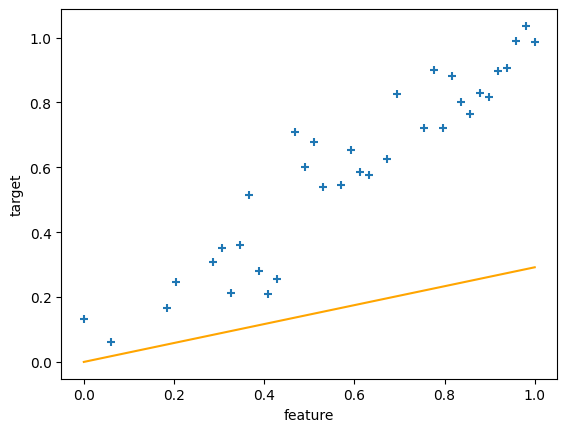


Epoch 1, loss 7.631542790172214

Epoch 2, loss 3.9841907951385167

Epoch 3, loss 2.155190329213878

Epoch 4, loss 1.2380200892953057

Epoch 5, loss 0.7780960681349134


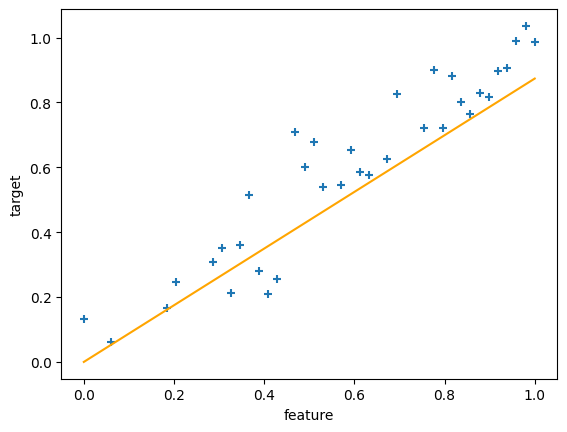


Epoch 6, loss 0.5474626524027094

Epoch 7, loss 0.4318092618315881

Epoch 8, loss 0.3738137336982002

Epoch 9, loss 0.3447313067424405

Epoch 10, loss 0.3301476382276577


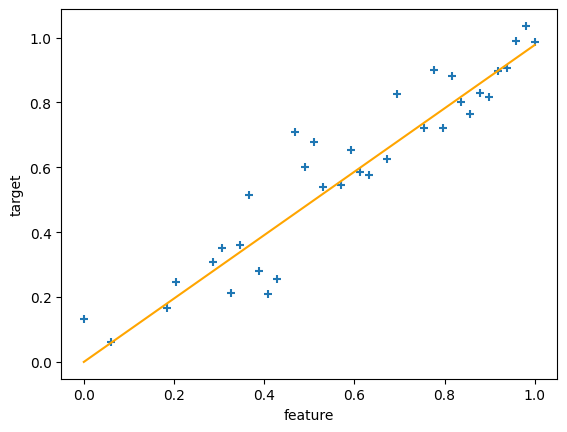


Epoch 11, loss 0.32283451447520717

Epoch 12, loss 0.31916727677267426

Epoch 13, loss 0.31732830442349547

Epoch 14, loss 0.3164061336848198

Epoch 15, loss 0.315943702114465


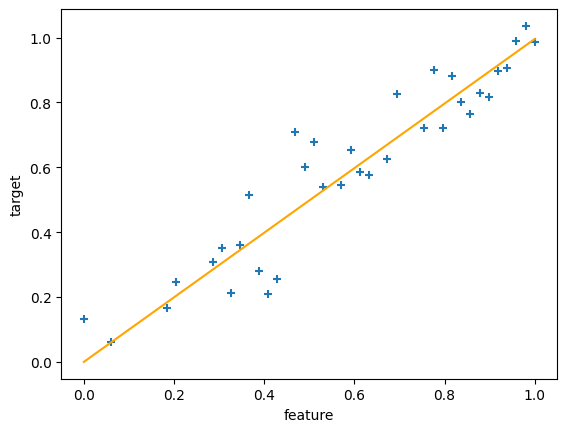


Epoch 16, loss 0.3157118112635714

Epoch 17, loss 0.3155955273197936

Epoch 18, loss 0.3155372155945642

Epoch 19, loss 0.31550797460747043

Epoch 20, loss 0.31549331142741777


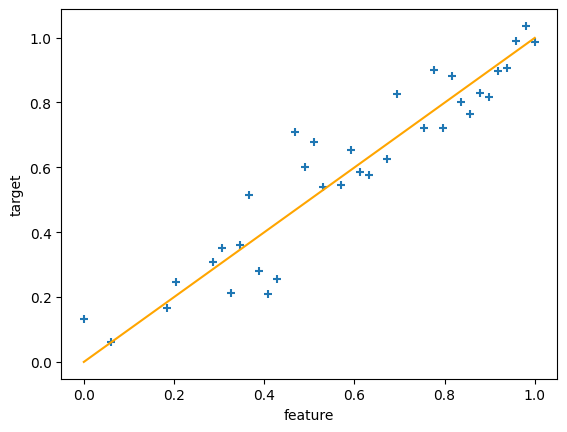


Epoch 21, loss 0.31548595843182403

Epoch 22, loss 0.3154822711999952

Epoch 23, loss 0.31548042220139516

Epoch 24, loss 0.31547949500289457

Epoch 25, loss 0.31547903005010364


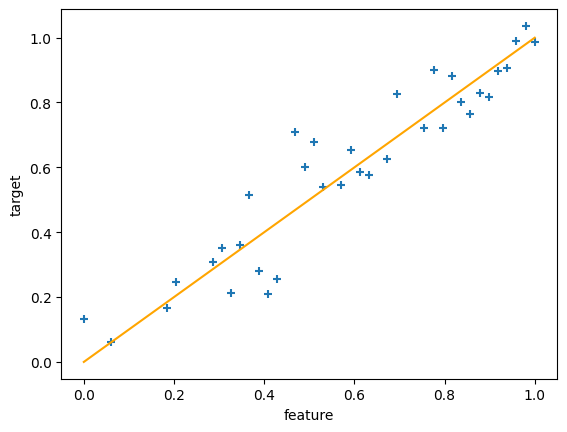


Epoch 26, loss 0.31547879689496194

Epoch 27, loss 0.31547867997702717

Epoch 28, loss 0.31547862134738086

Epoch 29, loss 0.3154785919469691

Epoch 30, loss 0.315478577203844


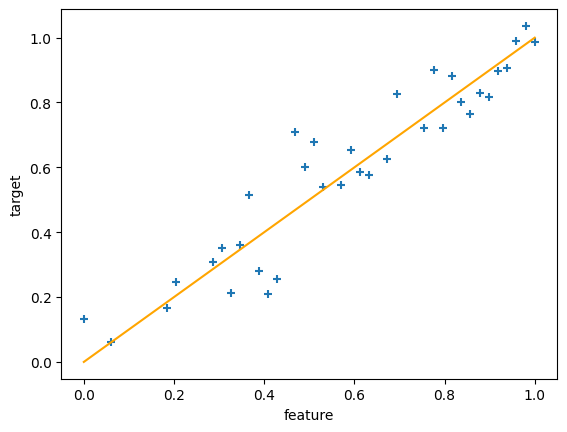


Epoch 31, loss 0.3154785698107592

Epoch 32, loss 0.3154785661034243

Epoch 33, loss 0.31547856424434473

Epoch 34, loss 0.315478563312091

Epoch 35, loss 0.3154785628446033


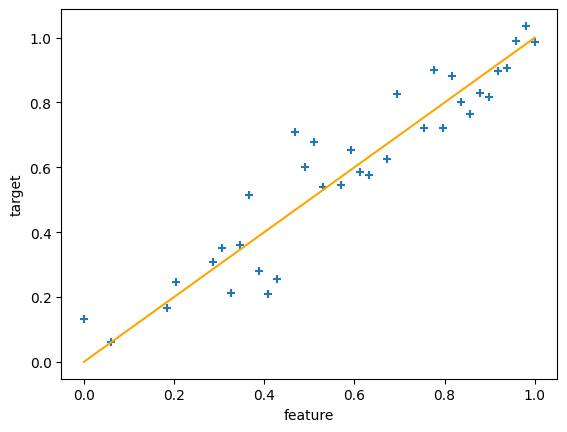


Epoch 36, loss 0.3154785626101769

Epoch 37, loss 0.3154785624926216

Epoch 38, loss 0.3154785624336723

Epoch 39, loss 0.3154785624041116

Epoch 40, loss 0.31547856238928806


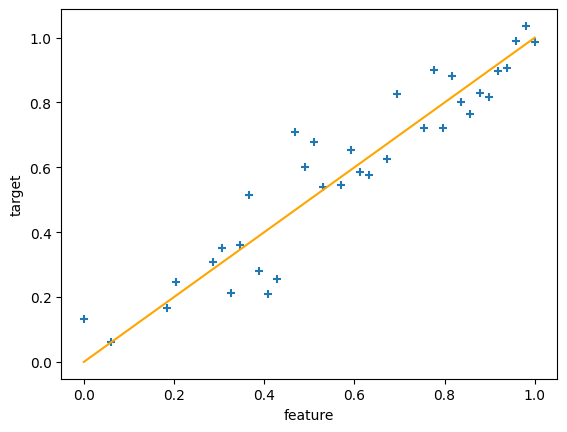


Epoch 41, loss 0.3154785623818547

Epoch 42, loss 0.31547856237812705

Epoch 43, loss 0.3154785623762579

Epoch 44, loss 0.3154785623753205

Epoch 45, loss 0.31547856237485045


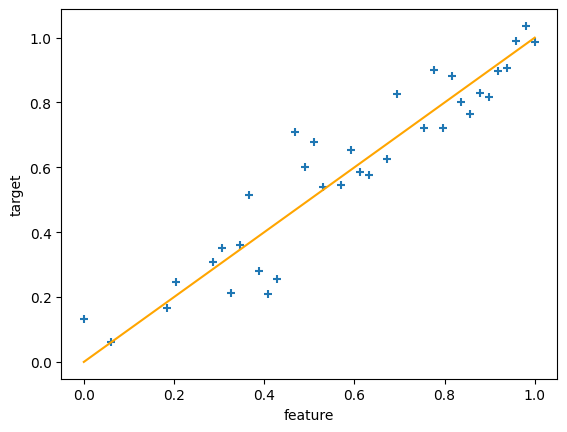


Epoch 46, loss 0.31547856237461475

Epoch 47, loss 0.3154785623744966

Epoch 48, loss 0.3154785623744374

Epoch 49, loss 0.3154785623744077

Epoch 50, loss 0.3154785623743927


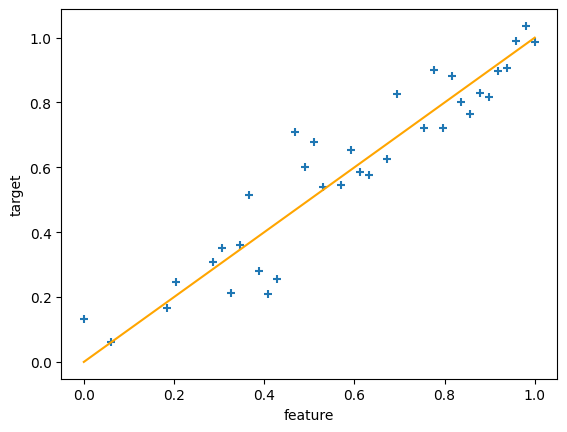


Epoch 51, loss 0.31547856237438526

Epoch 52, loss 0.3154785623743815

Epoch 53, loss 0.3154785623743796

Epoch 54, loss 0.31547856237437866

Epoch 55, loss 0.3154785623743782


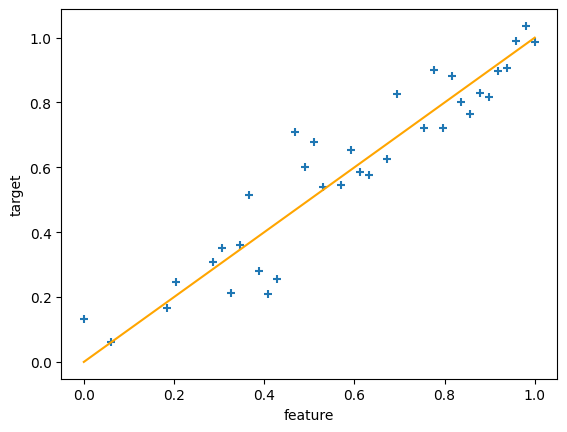


Epoch 56, loss 0.315478562374378

Epoch 57, loss 0.3154785623743779

Epoch 58, loss 0.3154785623743779

Epoch 59, loss 0.31547856237437777

Epoch 60, loss 0.31547856237437777


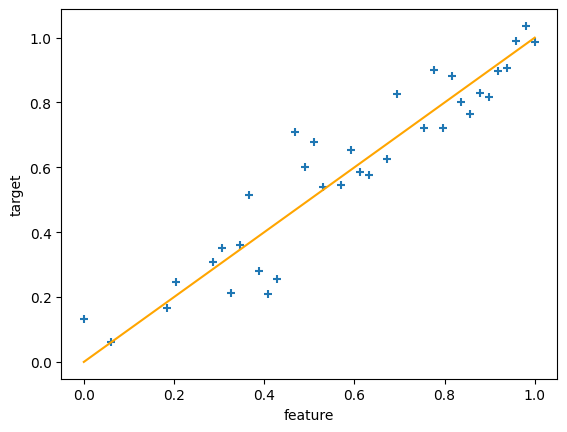


Epoch 61, loss 0.31547856237437777

Epoch 62, loss 0.31547856237437777

Epoch 63, loss 0.31547856237437777


In [ ]:
losses, theta = train_batch_gradient_descent(xtrain, ytrain, 100, plot_every=5)


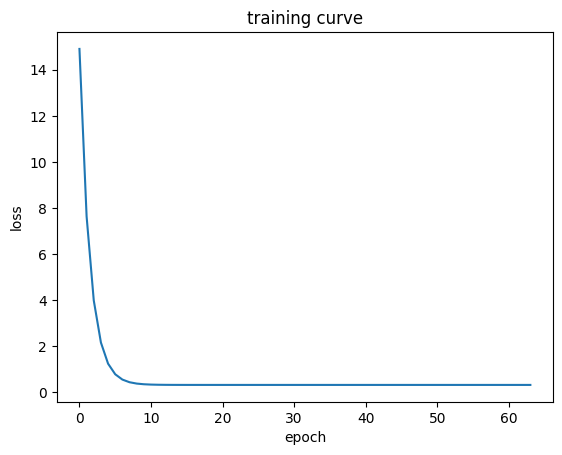

In [ ]:
plot_loss(losses)


# Faire les predictions sur les tests data puis calculez l'erreur

In [ ]:
ypred = linear_function(xtest, theta)
loss = mean_squared_error(ytest, ypred)
print('loss:',loss)

loss: 0.09567888943773496


Observations:
  1. What do you observe in the plots
  2. You may try different number of epochs
One more thing, it seems the train curve flattens out so quickly, yet, training still progresses regardless.

Can you think of how to avoid the unnecessary training after converging,
Right!...
- You may end the training when we hit a threshold loss value
- Early stopping - stop the training when loss does not change after a certain number of epochs (patience)